# CS 316 : Introduction to Deep Learning
## Lab 04 : Regression
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_04_aa01234.ipynb* before starting the lab. Replace 01234 with your student ID. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

5. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file format will not be accepted.

6. Each task has points assigned to it. Total Lab is of 100 points.

7. Use of for loops is strictly prohibited.

8. If there are any theoretical questions, there will be a separate cell given for it after the question. You have to edit it to write your answer there.

10. Comments are also part of question and are there to help you understand and write the code. Read them carefully.

11. Each question either contains testcases or images. Do not edit them. Run the testcases to check whether your output is correct. If the question doesn't have testcases then compare the output image with image given at the end.

12. Go to settings> AI Assistance> Uncheck all options, save your notebook, refresh the tab and then start your lab.

9. If you have any questions, please feel free to reach out to the course instructor, RA or TA.

## Task Overview


So far we have studied about how input layers are connected to hidden neurons and then to output. But we haven't completely applied it on any dataset. We are going to do that in this lab today. Lab is pretty short but at the same time necessary for you as this will help you to understand the full cycle.

## Setup
Let's import the libraries first.

In [1]:
# Importing the essentials
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
import urllib.request
import pandas as pd
from keras.datasets import fashion_mnist,cifar10,mnist
np.random.seed(42)

# Q1: [10 Points]

A suitable dataset is required in order to obtain a linear regression model with reasonable accuracy. There are numerous datasets available, and many of them can be found online. You can also download the dataset manually, but scripting its retrieval is more convenient and may save time.

Your task is to load the Dataset by completing the function `get__dataset` using the Pandas's "read_parquet" function. Parquet files are also like CSV files. Use help() function to understand the working of Pandas's read_parquet method. [This](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) is the link to all the Datasets. You will scroll down to the datasets posted year-wise. From them you will go to datasets of 2020 and copy dataset link of Yellow Taxi January 2020 and use that in read_parquet function.

In [4]:
# help(pd.read_parquet)
# TODO: Complete get_dataset
def get_dataset():
  # BEGIN SOLUTION
  link="https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet"
  dataset=pd.read_parquet(link)
  return dataset
  # END SOLUTION










In [5]:
# DO NOT EDIT THIS CELL
# TEST CASE for get_dataset
def test_get_dataset():
    # Assuming the function downloads and returns the dataset
    dataset = get_dataset()

    # Check if the returned object is a pandas DataFrame
    assert isinstance(dataset, pd.DataFrame), "The returned object is not a pandas DataFrame."

    # Check if the DataFrame has the expected number of columns for the specified dataset
    # The yellow_tripdata_2020-01.parquet file has 18 columns.
    expected_columns = 19
    assert dataset.shape[1] == expected_columns, f"The number of columns is incorrect. Expected: {expected_columns}, Got: {dataset.shape[1]}"

    print("Test case for get_dataset passed!")

# Run the test case
test_get_dataset()

Test case for get_dataset passed!


### Exploratory Data Analysis

After downloading the csv file, let's observe the data and try to understand what it means.

In [6]:
# DO NOT EDIT
# Load the dataset
dataset = get_dataset()
# View the top rows of the dataset
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


dataset.info(), dataset.describe() are 2 common functions to look at and understand the dataset.

In [7]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.405008e+06,6405008,6405008,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.339567e+06
mean,1.673002e+00,2020-01-17 03:05:16.413238,2020-01-17 03:21:13.417920,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.257319e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.299052e+00
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,2020-01-09 17:10:53,2020-01-09 17:27:34.750000,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,2020-01-16 23:16:29,2020-01-16 23:32:24,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2020-01-24 18:24:30,2020-01-24 18:39:51,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,5.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00
std,4.691265e-01,NaN,NaN,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.885669e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.017109e-01


Most of the variables are unlikely to have a significant impact on Chance of admit. To avoid dealing with irrelevant columns, try finding out which variables have strong correlation with data. A way to see this is using heatmaps. Heatmaps take numerical data as inputs and find correlation between all X and Y values. For those values which are not numerical, we convert them to numerical values and then make heatmap. That part is not covered in this lab. You need to explore it yourself outside the class. Since there are a lot of columns, we are not finding correlation between all values. We are just trying it for 10 columns.

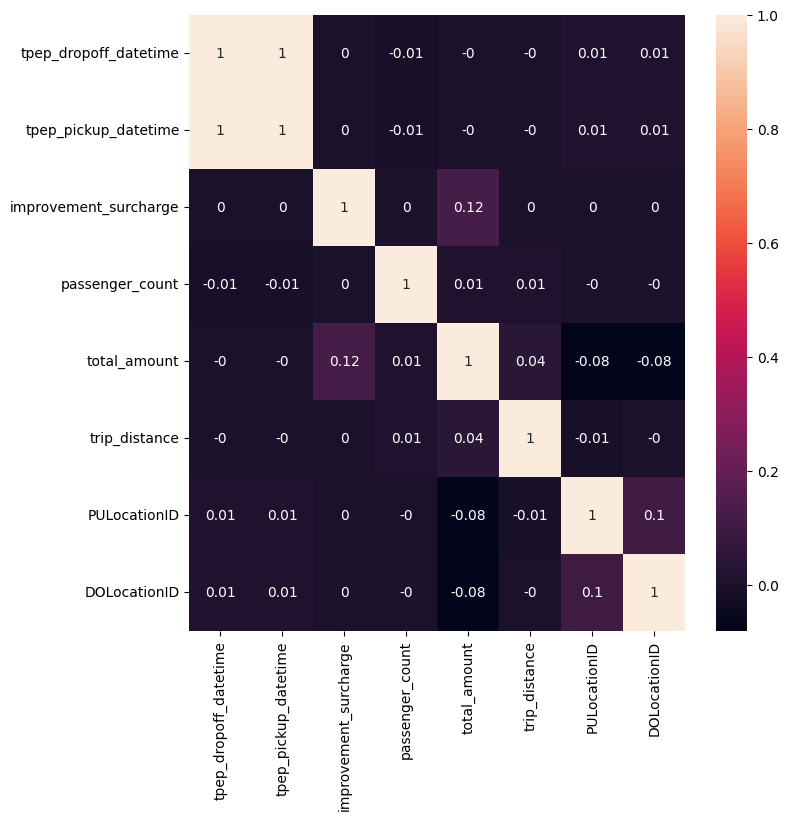

In [8]:
# DO NOT EDIT
updated_dataset=dataset[['tpep_dropoff_datetime','tpep_pickup_datetime','improvement_surcharge','passenger_count','total_amount','trip_distance','PULocationID','DOLocationID']]
plt.figure(figsize=(8,8))
correlation_matrix = updated_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

If we wanted to predict total_amount, you can see very clearly that it is affected highly by PULocationID, DOLocationID and improvement surcharge. We will use these 3 columns to predict total_amount.

#Q2: [10 Points]
We need to drop all remaining columns from the dataset and just keep these 3. You can use help(updated_dataset.drop) to understand how to drop column or columns from a dataframe. Or, you can use the same method which I did in few cells earlier to create updated_dataset.

In [28]:
help(dataset.drop)

#TOTO
def update_dataset(dataset):
    # BEGIN SOLUTION
    # final_dataset=dataset.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee'])
    final_dataset=dataset[['improvement_surcharge','DOLocationID','PULocationID']]
    # END SOLUTION
    return final_dataset

Help on method drop in module pandas.core.frame:

drop(labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels fr

In [29]:
# TEST CASE for Q2 - dropping columns
def test_drop_columns():
    # Create a sample DataFrame
    expected_columns = ["improvement_surcharge","DOLocationID","PULocationID"]
    final_dataset=update_dataset(dataset)
    # Check if the returned object is a pandas DataFrame
    assert isinstance(final_dataset, pd.DataFrame), "The returned object is not a pandas DataFrame."

    # Check if the remaining columns are the expected ones
    assert list(final_dataset.columns) == expected_columns, f"The remaining columns are incorrect. Expected: {expected_columns}, Got: {list(list(final_dataset.columns))}"

    print("Test case for dropping columns passed!")

# Run the test case
test_drop_columns()

Test case for dropping columns passed!


#Q3: [20 Points]

To determine whether regression is effective, we can split our data into a training and test set and compare performance. Before splitting data, make sure to shuffle it because data is sometimes arranged in a specific order, such as all low-end houses first. If the data is not properly shuffled, it may fail to learn patterns. So, to avoid bias in your training data, shuffle it before splitting.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=13ZwKJ0RyGZo76LI9NBVVRQc83T5moGcq)

</center>








**Your task is to split the dataset into training and test dataset by completing the function `train_test_split(inputs,outputs,test_size,seed)`**

**Important note on seed**: Reproducability is extremely important. Sometimes, you might find a good seed for a split. When dealing with random shuffling, you will get different results everytime you run. You can set a global seed by using `np.random.seed(42)` however that sets the global seed. It is useful over here to not change the global seed here, since if you want to reproduce the same result, you will have to run the entire code again. The solution to this problem is that you create a generator with a specific seed and use that for generation. [You can find more about setting seeds here](https://builtin.com/data-science/numpy-random-seed)

In [69]:
# TODO: Complete train_test_split
def train_test_split(inputs,outputs,test_size,seed = 0):
    """
    Splits the data into training and test sets.
    Return 4 numpy arrays. X_train, X_test, Y_train, Y_test
    where training data is test_size proportion of data provided.

    Args:
        inputs [np.array] : numpy array of input data
        outputs [np.array]: numpy array of output labels
        test_size [float]: proportion of data to be used as test data. e.g. 0.2 means 20% of data is used for test data.
        seed [int]: A seed to create random number generator. (For reproducability)
    """
    rng = np.random.default_rng(seed)
    assert(len(inputs) == len(outputs))
    assert(test_size <= 1.0)
    assert(test_size >= 0.0)
    num_samples = len(inputs)
    num_train = int(num_samples * (1.0 - test_size))
    # Create index using np.arange
    # Shuffle the dataset using rng.shuffle
    # Use help function to understand rng.shuffle
    # Split the dataset into train, test
    # BEGIN SOLUTION
    index=np.arange(num_samples)
    rng.shuffle(index)

    X_train = inputs[index[:num_train]]
    X_test = inputs[index[num_train:]]
    Y_train = outputs[index[:num_train]]
    Y_test = outputs[index[num_train:]]
    # END SOLUTION
    return X_train, X_test, Y_train, Y_test
# help(np.arange)

In [71]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
x_input = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
y_output = np.array([3,4,5,6,7,8,9,10,11,12])
seed = 0
split = 0.5
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,split,seed)
print(f'x_train: {x_train}, x_test: {x_test}, y_train: {y_train}, y_test: {y_test}')
assert np.allclose(x_train,np.array([5.0,7.0,3.0,8.0,4.0]))
assert np.allclose(x_test,np.array([6.0,10.0,1.0,9.0,2.0]))
assert np.allclose(y_train,np.array([ 7,  9,  5, 10,  6]))
assert np.allclose(y_test,np.array([8,12,3,11,4]))

x_train: [5. 7. 3. 8. 4.], x_test: [ 6. 10.  1.  9.  2.], y_train: [ 7  9  5 10  6], y_test: [ 8 12  3 11  4]


RELU Activation Function

In [72]:
# DO NOT EDIT
def ReLU(preactivation):
  activation=np.where(preactivation>=0,preactivation,0)
  return activation

def relu_derivative(x):
  return np.where(x > 0, 1, 0)

#Q4 - [20 Points]



Before we perform operations, we must define our model, relating its inputs and parameters to its outputs. For this specific question, we will build a model with 1 hidden layer. Hence, a total of 3 layers, 1 input, 1 hidden and 1 output.

Previously, we used to store all theta values as separate variables. For this lab, we will build a matrix of all those values.

**In this task you are required to initialse the model weights and bias (thetas) by implementing the function `initialise_model`.**
You have to initialize weights and biases using np.random.randn function. Scale your weights and biases with a factor of 0.0000001 after initialization to scale them.
This is the image of the neural network.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1CquQEUapYXnRTfBVGavzuv3-IuWg4_bN)

</center>

In [73]:
# TODO: Complete initialise_model
def initialise_model(input_size,hidden_size,output_size):
    """
    Args:
        input_size: Size of the input layer
        hidden_size: Size of the first hidden layer
        output_size: Size of the output layer
    """
    # BEGIN SOLUTION
    weights1 = np.random.randn(input_size,hidden_size)*0.0000001
    bias1 = np.random.randn(1,hidden_size)*0.0000001
    weights2 = np.random.randn(hidden_size,output_size)*0.0000001
    bias2 = np.random.randn(1,output_size)*0.0000001



    # END SOLUTION
    return weights1,bias1,weights2,bias2

#### This line is just for testing
#### Remove the comment from print function and run it.
print(initialise_model(1,2,1))

(array([[-1.23695071e-07, -1.32045661e-07]]), array([[5.21941566e-08, 2.96984673e-08]]), array([[2.50492850e-08],
       [3.46448209e-08]]), array([[-6.80024722e-08]]))


In [74]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
weights1,bias1,weights2,bias2 = initialise_model(1,2,1)
print(f'weights1: {weights1}, bias1: {bias1}, weights2: {weights2}, bias2: {bias2}')
#Check the dimensions of weights1, bias1, weights2, bias2
assert weights1.shape == (1,2)
assert bias1.shape == (1,2)
assert weights2.shape == (2,1)
assert bias2.shape == (1,1)
print("Test Cases Passed")

weights1: [[2.32253697e-08 2.93072473e-08]], bias1: [[-7.14351418e-08  1.86577451e-07]], weights2: [[ 4.73832921e-08]
 [-1.19130350e-07]], bias2: [[6.56553609e-08]]
Test Cases Passed


#Q5 - [20 Points]



In class, we have studied the method of multiplying weights with x and add bias to it. However, there are other conventions as well. When going forward, convention for multiplication is to multiple x with weights and then add bias. For this specific task, we will multiply, x with weights and then add bias. Complete the below given function following this convention.

Here are the equations based on this converntion.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1sjRs9OGNGTT_oMjJvy_dgi98U4hfPoxf)

</center>

Function returns the linear output of the model.

Args:

    x: Input data (numpy array)
    weights1: Weights for the first hidden layer (numpy array)
    weights2: Weights for the output layer (numpy array)
    bias1: Biases for the first hidden layer (numpy array)
    bias2: Biases for the output layer (numpy array).

In [54]:
#TODO: Complete forward
def forward(x,weights1,bias1,weights2,bias2):
    # BEGIN SOLUTION
    hidden_layer_1 = np.dot(x,weights1) + bias1
    hidden_layer_1 = ReLU(hidden_layer_1)
    output = np.dot(hidden_layer_1,weights2) + bias2
    return hidden_layer_1,output
    # END SOLUTION

In [55]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
x_input = np.array([[1.0,2.0]])
weights1 = np.array([[0.3,0.4],[0.5,0.6]])
weights2 = np.array([[0.7],[0.8]]) # Updated weights2 to match the output layer size of 1
bias1 = np.array([[0.1,0.2]])
bias2 = np.array([[0.3]]) # Updated bias2 to match the output layer size of 1
hidden_layer_1,output = forward(x_input,weights1,bias1,weights2,bias2) # Removed extra return values
print(f'hidden_layer_1: {hidden_layer_1}, output: {output}')
assert np.allclose(hidden_layer_1,np.array([[1.4, 1.8]]))
assert np.allclose(output,np.array([[1.4*0.7 + 1.8*0.8 + 0.3]])) # Updated assertion for the output
print("Test Cases Passed")

hidden_layer_1: [[1.4 1.8]], output: [[2.72]]
Test Cases Passed


Evaluation:

Mean Squared error is defined as

$$\text{MSE} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y}_i)^2$$

where $y_i$ is your actual value and $\hat{y}_i$ is the predicted value. You have already completed this in previous lab.

In [56]:
def mean_squared_error(y_actual,y_prediction):
    """
    Returns mean squared error using prediction and actual data
    Args:
        y_actual [np.array]     : Actual output vector
        y_prediction [np.array] : Predicted output vector
    """
    #print(y_actual,y_prediction)
    return np.mean(np.square(y_actual - y_prediction))

**Gradient Descent**

This has been calculated for you. We will study more about Gradient Descent later in the course.

Calculates gradients for the weights and biases using backpropagation.

Args:

  X: Input data (numpy array)

  y: Target labels (numpy array)

  output: Output of the neural network (numpy array)

  hidden_layer_1: Output of the first hidden layer (numpy array)

  weights1: Weights for the first hidden layer (numpy array)

  weights2: Weights for the output layer (numpy array)

  bias1: Biases for the first hidden layer (numpy array)

  bias2: Biases for the output layer (numpy array)

Returns:
  Dictionary containing gradients for weights and biases

In [57]:
def gradient_descent(X, y, output, hidden_layer_1, weights1, weights2, bias1, bias2):
    """
    Calculates gradients for the weights and biases using backpropagation with ReLU activation.

    Args:
        X: Input data (numpy array)
        y: Target labels (numpy array)
        output: Output of the neural network (numpy array)
        weights1: Weights for the first hidden layer (numpy array)
        weights2: Weights for the output layer (numpy array)
        bias1: Biases for the first hidden layer (numpy array)
        bias2: Biases for the second hidden layer (numpy array)

    Returns:
        gradients for weights and biases
    """
    # Calculate the error
    delta_output = output - y

    # Calculate the error for the first hidden layer
    delta_hidden_1 = np.dot(delta_output, weights2.T) * relu_derivative(hidden_layer_1)

    # Calculate gradients
    d_weights1 = np.dot(X.T, delta_hidden_1)
    d_weights2 = np.dot(hidden_layer_1.T, delta_output)
    d_bias1 = np.sum(delta_hidden_1, axis=0)
    d_bias2 = np.sum(delta_output, axis=0)

    return d_weights1, d_weights2, d_bias1, d_bias2

#Q6 - [20 Points]

Now that we have all of the parts in place, we are ready to **implement the main training loop.**

In each iteration, we will use the entire batch of training examples,
and pass them through our model to obtain a set of predictions.
After calculating the loss, we initiate the backwards pass through the network,
storing the gradients with respect to each parameter.
Finally, we will use the gradient descent optimization algorithm
to update the model parameters.

In summary, we will execute the following loop:

* Split dataset (already completed)
* Initialize parameters (weights and biases) (**complete this**)
* Repeat until done
    * Compute output, hidden_layer1 using forward function (**complete this**)
    * Compute Loss using loss function (**complete this**)
    * Compute gradient (call gradient descent functon for this and send parameters)
    * Update parameters (already completed): This is done by multiplying learning rate with weights received from gradient descent and subtracting them from original values

In each *epoch*, we will iterate through the entire dataset once
passing through every example in the training dataset. The number of epochs `num_epochs` and the learning rate `lr` are both hyperparameters.





**In this task, you have to implement the linear regression by completing the function `main`**.

In [58]:
#TODO: Complete the function main
def main(X,y,num_epochs,lr):
    """
    Returns the final model weight and bias. Also, plots a graph of the num_epochs vs mean squared error.
    Args:
        X [np.array]: Inputs
        y [np.array]: Outputs
        num_epochs [int]: Number of epochs
        lr [floar]: Learning Rate
    """
    # Split the data into train & test dataset. Split should 0.2 and seed should be equal to 0
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,0.2,42)
    hidden_size=8
    output_size=1
    # Task: Initialize Weights
    # BEGIN SOLUTION



#Intialize function here

    weights1,bias1,weights2,bias2= initialise_model(X_train.shape[1],hidden_size,output_size)




    # END SOLUTION
    # Initialise empty L list
    L = []
    # Main Loop
    for epoch in range(num_epochs):
        # BEGIN SOLUTION







        # Compute the linear output using the training data
        #Output Calculation here
        hidden_layer_1,output = forward(X_train,weights1,bias1,weights2,bias2)
        # Compute the loss on the training output
        #Loss Calculation here
        loss = mean_squared_error(Y_train,output)







        # END SOLUTION
        # Store loss value in Python list
        print("Loss is ",loss,"at Epoch",epoch)
        L.append(loss)
        # Compute grad_w, grad_b
        d_weights1,d_weights2,d_bias1,d_bias2 = gradient_descent(X_train, Y_train, output, hidden_layer_1,weights1, weights2, bias1, bias2)
        #print(d_weights1,d_weights2,d_weights3,d_weights4,d_bias1,d_bias2,d_bias3,d_bias4)
        # Update w,b
        weights1 -= lr*d_weights1
        bias1 -= lr*d_bias1
        weights2 -= lr*d_weights2
        bias2 -= lr*d_bias2
    # Plot
    plt.plot([epoch for epoch in range(num_epochs)],L)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Loss')
    plt.title('Epochs vs Mean Squared Loss')
    plt.show()
    return weights1,bias1,weights2,bias2

Loss is  309.3651134158783 at Epoch 0
Loss is  186.51046275286535 at Epoch 1
Loss is  157.30137950883383 at Epoch 2
Loss is  150.356827231919 at Epoch 3


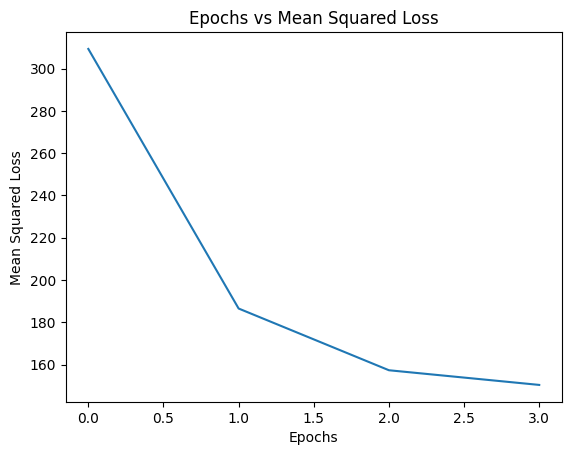

Test for main function executed.


In [59]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
final_dataset=update_dataset(dataset)
# Assuming X and Y are the input and output data respectively
# You need to replace X and Y with your actual data from the notebook
X = final_dataset[["improvement_surcharge","DOLocationID","PULocationID"]].values
Y = dataset['fare_amount'].values.reshape(-1, 1) # Assuming 'total_amount' is your target variable

# Apply StandardScaler to the entire dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
weights1,bias1,weights2,bias2 = main(X_scaled,Y,4,0.0000001)

# Since the main function now returns weights and biases for a one-hidden-layer model,
# you would typically add assertions here to check the shapes or types of these returned values
# or perform a forward pass with the test data and check the loss.
# For now, we will just print a message indicating the test has run.
print("Test for main function executed.")

If output to your code is correct then this will be the ouput

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1kwyN5Vc2x2lLxL6328SUkDEg_LKLdw7J)

</center>